# Отчётный проект по курсу "Основы машинного обучения"
### Выполнил студент 3-го курса Биологического факультета Красников Сергей

# Постановка задачи

На основании набора данных "Ирисы" требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

# Описание набора данных

Ирисы - это набор данных, который содержит в себе сведения об измерениях частей околоцветника трёх видов ирисов - Iris setosa, Iris virginica и Iris versicolor, а именно - о длине лепестков (petal length), ширине лепестков (petal width), длине чашелистиков (sepal length) и ширине чашелистиков (sepal width). Измерения были проведены американским ботаником Эдгаром Андерсоном, после чего набор данных был использован математиком Рональдом Фишером для демонстрации разработанного им метода дискриминантного анализа. "Ирисы" содержат данные о 150 образцах растений.

# Подключение библиотек и модулей для разведочного анализа

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Разведочный анализ данных

Для более подробного ознакомления с набором данных был проведён его разведочный анализ с визуализацией взаимоотношений между выходными переменными - видами ирисов.

In [6]:
iris = pd.read_csv('https://raw.githubusercontent.com/yakushinav/omo/main/data/iris.csv')
iris.head()
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


После считывания данных в DataFrame и вызова функции его описания видно, что набор данных имеет 150 строк записей и 5 столбцов переменных.

In [11]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

В наборе данных отсутствуют пропуски.

In [14]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Переменные, отражающие значения ширины и длины частей околоцветника представлены числами с плавающей запятой, а обозначения видов - строками.

In [17]:
iris.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Для каждого вида в наборе данных есть 50 измерений.

## Визуализация набора данных

#### Точечные диаграммы значений признаков

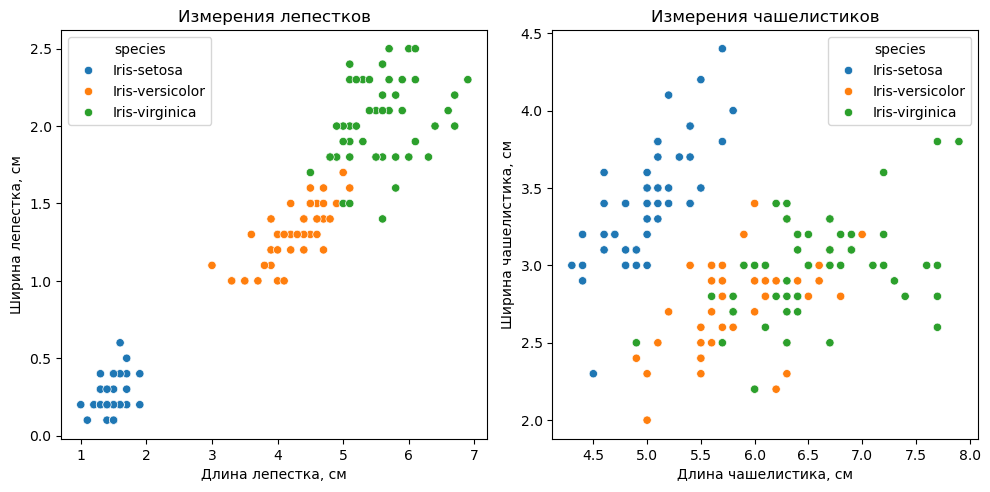

In [44]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))

sns.scatterplot(x = iris['petal_length'], y = iris['petal_width'], ax = axes[0], hue = iris['species'])
axes[0].set_xlabel('Длина лепестка, см')
axes[0].set_ylabel('Ширина лепестка, см')
axes[0].set_title('Измерения лепестков')

sns.scatterplot(x = iris['sepal_length'], y = iris['sepal_width'], ax = axes[1], hue = iris['species'])
axes[1].set_xlabel('Длина чашелистика, см')
axes[1].set_ylabel('Ширина чашелистика, см')
axes[1].set_title('Измерения чашелистиков')

fig.tight_layout(pad = 1.0)

На данных точечных диаграммах видно, что вид Iris setosa линейно отделим по всем признакам от двух других видов. Также можно отметить, что измерения чашелистиков визуально сильнее дифференцируют виды, нежели измерения лепестков.

#### Гистограммы распределений значений измерений лепестков и чашелистиков

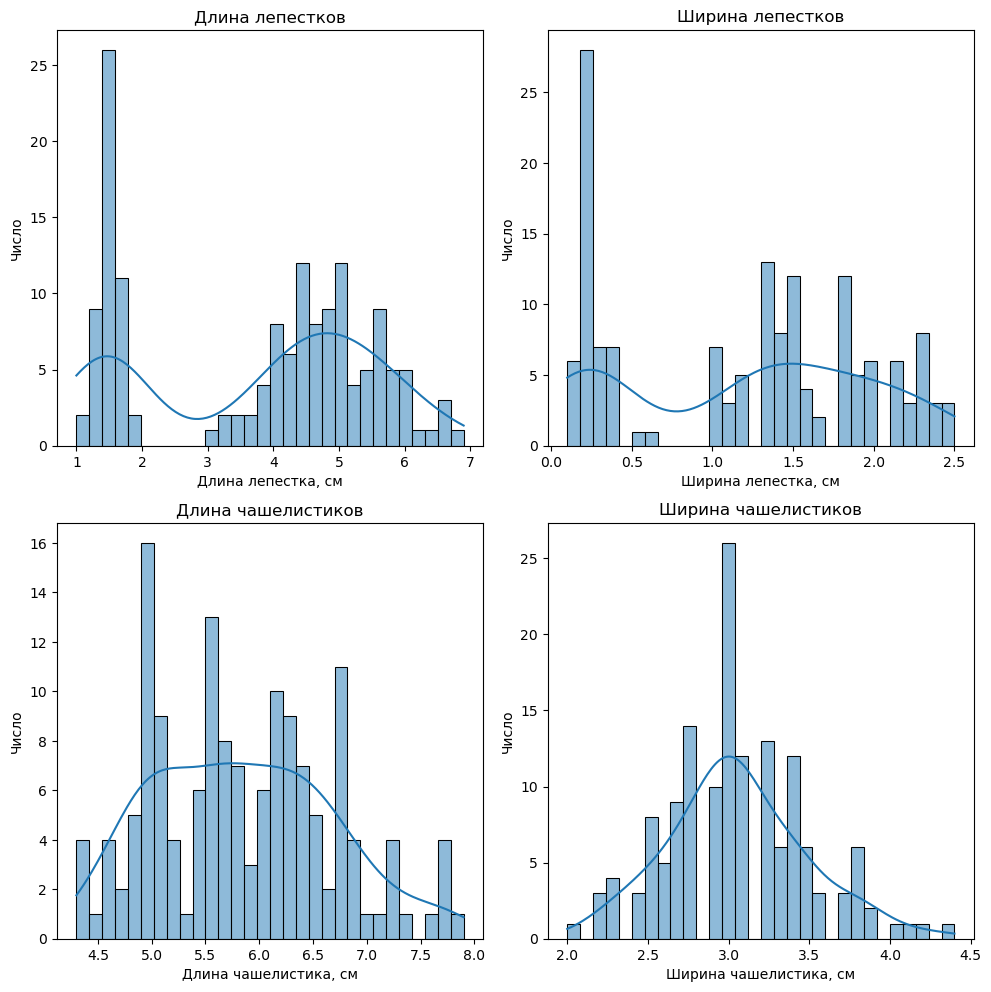

In [42]:
fig, axes = plt.subplots(2,2, figsize = (10, 10))

sns.histplot(iris['petal_length'], bins = 30, ax = axes[0, 0], kde = True)
axes[0, 0].set_xlabel('Длина лепестка, см')
axes[0, 0].set_ylabel('Число')
axes[0, 0].set_title('Длина лепестков')

sns.histplot(iris['petal_width'], bins = 30, ax = axes[0, 1], kde = True)
axes[0, 1].set_xlabel('Ширина лепестка, см')
axes[0, 1].set_ylabel('Число')
axes[0, 1].set_title('Ширина лепестков')

sns.histplot(iris['sepal_length'], bins = 30, ax = axes[1, 0], kde = True)
axes[1, 0].set_xlabel('Длина чашелистика, см')
axes[1, 0].set_ylabel('Число')
axes[1, 0].set_title('Длина чашелистиков')

sns.histplot(iris['sepal_width'], bins = 30, ax = axes[1, 1], kde = True)
axes[1, 1].set_xlabel('Ширина чашелистика, см')
axes[1, 1].set_ylabel('Число')
axes[1, 1].set_title('Ширина чашелистиков')

fig.tight_layout(pad = 1.0)

На данных гистограммах отображены распределения значений измерений элементов околоцветника изученных образцов цветов, а также даны оценки плотностей распределения этих значений (kde plot).

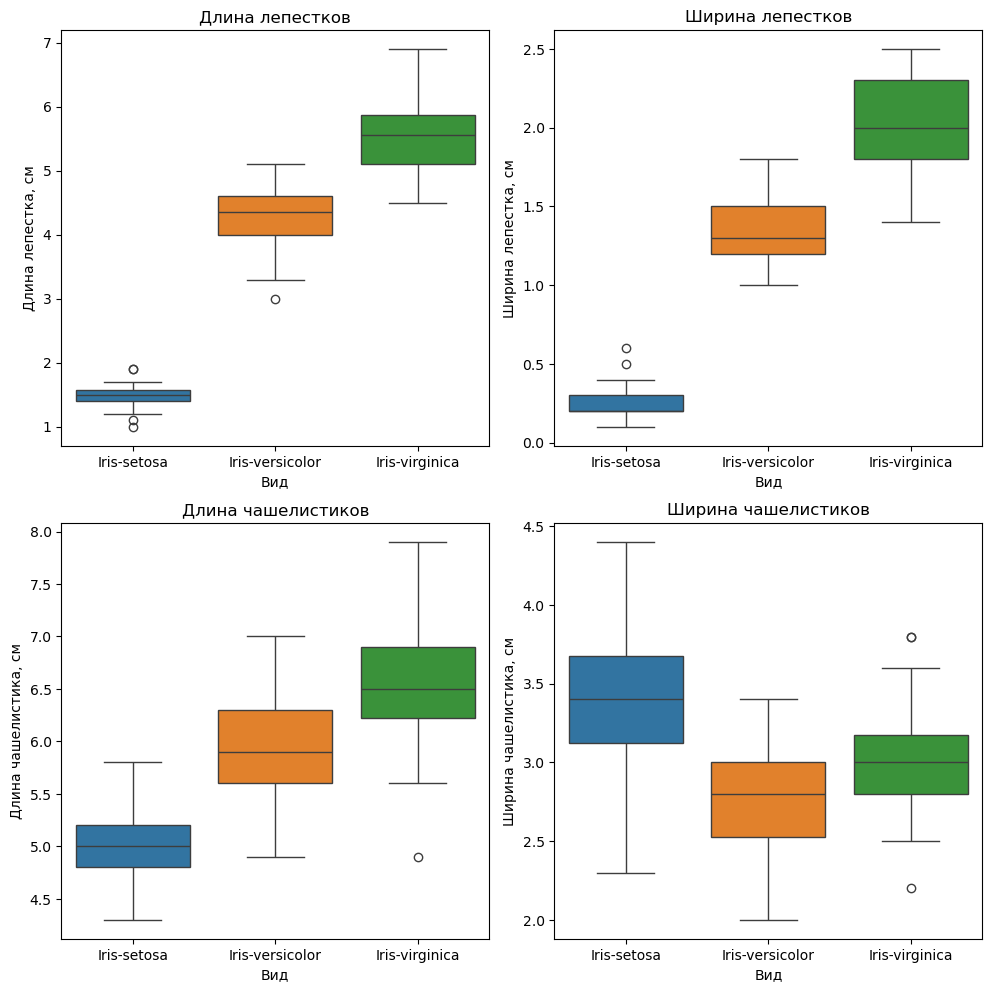

In [48]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

sns.boxplot(data = iris, x = 'species', y = 'petal_length', order = cn, ax = axes[0, 0], hue = 'species')
axes[0, 0].set_ylabel('Длина лепестка, см')
axes[0, 0].set_xlabel('Вид')
axes[0, 0].set_title('Длина лепестков')

sns.boxplot(data = iris, x = 'species', y = 'petal_width', order = cn, ax = axes[0, 1], hue = 'species')
axes[0, 1].set_ylabel('Ширина лепестка, см')
axes[0, 1].set_xlabel('Вид')
axes[0, 1].set_title('Ширина лепестков')

sns.boxplot(data = iris, x = 'species', y = 'sepal_length', order = cn, ax = axes[1, 0], hue = 'species')
axes[1, 0].set_ylabel('Длина чашелистика, см')
axes[1, 0].set_xlabel('Вид')
axes[1, 0].set_title('Длина чашелистиков')

sns.boxplot(data = iris, x = 'species', y = 'sepal_width', order = cn, ax = axes[1, 1], hue = 'species')
axes[1, 1].set_ylabel('Ширина чашелистика, см')
axes[1, 1].set_xlabel('Вид')
axes[1, 1].set_title('Ширина чашелистиков')

fig.tight_layout(pad = 1.0)

Из данных диаграмм видно, что для всех измерений кроме ширины чашелистиков имеет место тенденция к увеличению линейного размера части околоцветника в ряду видов: Iris setosa, Iris versicolor, Iris virginica.

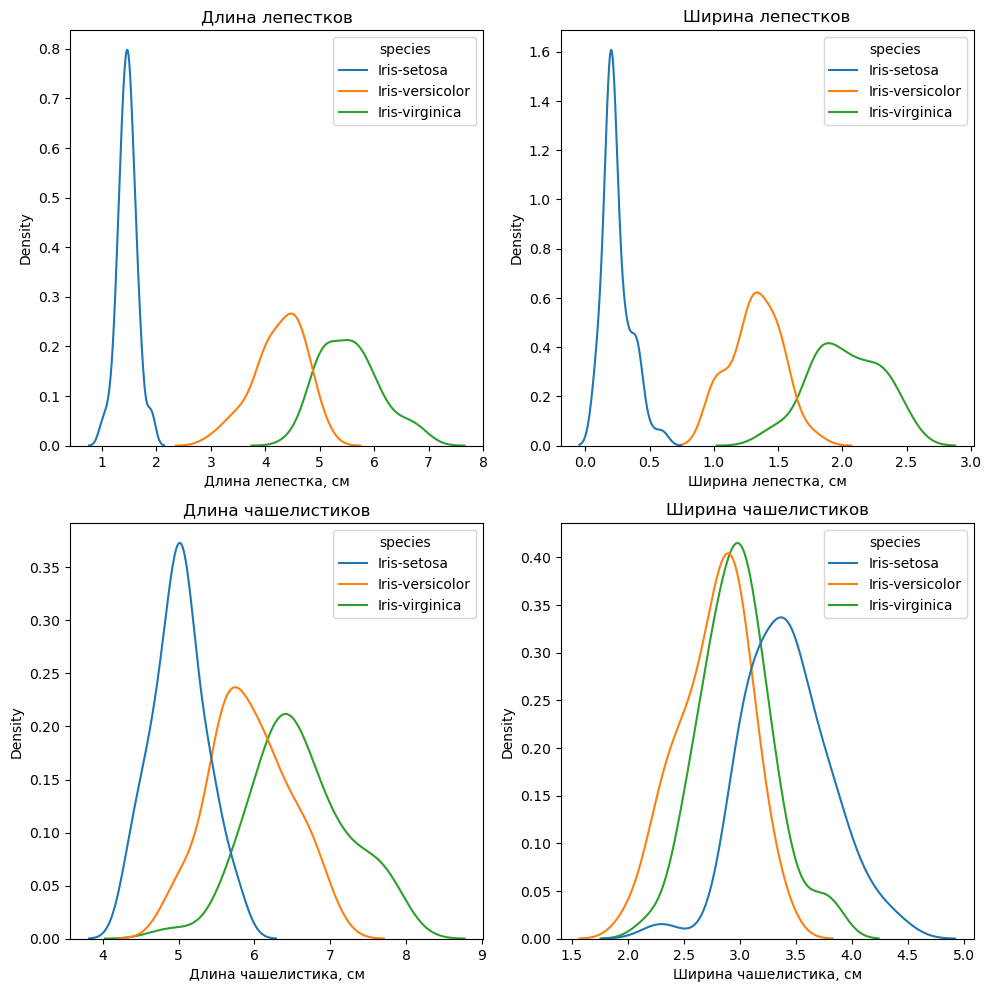

In [53]:
#### Диаграммы оценок плотностей распределения

fig, axes = plt.subplots(2, 2, figsize = (10, 10))

sns.kdeplot(data = iris, x = 'petal_length', hue = 'species', ax = axes[0, 0])
axes[0, 0].set_xlabel('Длина лепестка, см')
axes[0, 0].set_title('Длина лепестков')

sns.kdeplot(data = iris, x = 'petal_width', hue = 'species', ax = axes[0, 1])
axes[0, 1].set_xlabel('Ширина лепестка, см')
axes[0, 1].set_title('Ширина лепестков')

sns.kdeplot(data = iris, x = 'sepal_length', hue = 'species', ax = axes[1, 0])
axes[1, 0].set_xlabel('Длина чашелистика, см')
axes[1, 0].set_title('Длина чашелистиков')

sns.kdeplot(data = iris, x = 'sepal_width', hue = 'species', ax = axes[1, 1])
axes[1, 1].set_xlabel('Ширина чашелистика, см')
axes[1, 1].set_title('Ширина чашелистиков')

fig.tight_layout(pad = 1.0)

На данных диаграммах видно, что длина и ширина лепестков разделяют ирисы по видам лучше, чем измерения чашелистиков.

По результатам проведённого разведочного анализа набора данных "Ирисы", можно сказать, что он не содержит выбросов и пропусков, для него можно решить задачу классификации и построить модель машинног обучения.

# Выбор классификаторов

В рамках данного проекта для решения задачи классификации для набора данных "Ирисы" необходимо использовать три классификатора. В работе используются следующие классификаторы - деревья решений, метод к-ближайших соседей и дискриминантный анализ.

# Деревья решений

### Описание классификатора

Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

### Импорт необходимых библиотек и модулей

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Разделение выборки на тестовую и обучающую

In [59]:
train, test = train_test_split(iris, test_size = 0.4, stratify = iris['species'], random_state = 10)

x_train = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_train = train[['species']]
x_test = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_test = test[['species']]

### Создание и обучение модели машинного обучения

In [63]:
model_dt = DecisionTreeClassifier(max_depth = 3, random_state = 10)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

### Выполнение предсказаний, рассчёт точности модели

In [83]:
y_pred = model_dt.predict(x_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
confusions = metrics.confusion_matrix(y_pred, y_test)

print('Точность классификатора "Дерево решений" составила ', round(accuracy, 4)*100, '%')
print(confusions)

Точность классификатора "Дерево решений" составила  98.33 %
[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]


### Использование модели для предсказания класса нового объекта

In [101]:
new_iris_1 = [6, 3, 4, 1]
new_iris_1_predicted = model_dt.predict([new_iris_1])
print(new_iris_1_predicted)

new_iris_2 = [7, 4, 5, 2]
new_iris_2_predicted = model_dt.predict([new_iris_2])
print(new_iris_2_predicted)

new_iris_3 = [5, 2, 3, 0.5]
new_iris_3_predicted = model_dt.predict([new_iris_3])
print(new_iris_3_predicted)

['Iris-versicolor']
['Iris-virginica']
['Iris-setosa']


# Метод К ближайших соседей

### Описание классификатора

Метод К ближайших соседей - это простой алгоритм машинного обучения, который ранжирует все объекты обучающей выборки при помощи расчёта Евклидова расстояния между ними и помещает объект тестовой выборке в этот ряд. Решение о классовой принадлежности принимается на основании того, какой класс среди его К ближайших соседей преобладает. Число К выбирается 

### Импорт необходимых библиотек и модулей

In [78]:
from sklearn.neighbors import KNeighborsClassifier

### Разделение выборки на обучающую и тестовую

Разделение выборки было осуществлено при использовании классификатора "Деревья решений", в этой и следующей моделях будет использоваться то же разделение, то есть обучающие выборки x_train и y_train и тестовые выборки x_test и y_test.

### Создание и обучение модели машинного обучения

In [81]:
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

### Выполнение предсказаний, рассчёт точности модели

In [84]:
y_pred = model_knn.predict(x_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
confusions = metrics.confusion_matrix(y_pred, y_test)

print('Точность классификатора "Метод К ближайших соседей" составила ', round(accuracy, 4)*100, '%')
print(confusions)

Точность классификатора "Метод К ближайших соседей" составила  98.33 %
[[20  0  0]
 [ 0 19  0]
 [ 0  1 20]]


### Использование модели для предсказания класса нового объекта

In [102]:
new_iris_1 = [6, 3, 4, 1]
new_iris_1_predicted = model_knn.predict([new_iris_1])
print(new_iris_1_predicted)

new_iris_2 = [7, 4, 5, 2]
new_iris_2_predicted = model_knn.predict([new_iris_2])
print(new_iris_2_predicted)

new_iris_3 = [5, 2, 3, 0.5]
new_iris_3_predicted = model_knn.predict([new_iris_3])
print(new_iris_3_predicted)

['Iris-versicolor']
['Iris-virginica']
['Iris-versicolor']


# Линейный дискриминантный анализ

### Описание классификатора

Линейный дискриминантный анализ - это метод классификации, который строит линейную границу между классами на основе предположения, что признаки каждого класса распределены нормально и имеют одинаковую ковариационную матрицу. Он ищет такое направление в пространстве признаков, вдоль которого межклассовая вариация максимальна, а внутриклассовая — минимальна.

### Импорт необходимых библиотек и модулей

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Разделение выборки на обучающую и тестовую

Разделение выборки было осуществлено при использовании классификаторов "Деревья решений" и "Метод К ближайших соседей", в этой модели будет использоваться то же разделение, то есть обучающие выборки x_train и y_train и тестовые выборки x_test и y_test.

### Создание и обучение модели машинного обучения

In [86]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

### Выполнение предсказаний, рассчёт точности модели

In [87]:
y_pred = model_lda.predict(x_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
confusions = metrics.confusion_matrix(y_pred, y_test)

print('Точность классификатора "Линейный дискриминантный анализ" составила ', round(accuracy, 4)*100, '%')
print(confusions)

Точность классификатора "Линейный дискриминантный анализ" составила  100.0 %
[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]


### Использование модели для предсказания класса нового объекта

In [103]:
new_iris_1 = [6, 3, 4, 1]
new_iris_1_predicted = model_lda.predict([new_iris_1])
print(new_iris_1_predicted)

new_iris_2 = [7, 4, 5, 2]
new_iris_2_predicted = model_lda.predict([new_iris_2])
print(new_iris_2_predicted)

new_iris_3 = [5, 2, 3, 0.5]
new_iris_3_predicted = model_lda.predict([new_iris_3])
print(new_iris_3_predicted)

['Iris-versicolor']
['Iris-versicolor']
['Iris-versicolor']


# Выводы

Все построенные модели машинного обучения имеют высокую точность (от 98.33% до 100%). Модели деревьев решений и метода К ближайших соседей имеют одинаковую точность (98.33%), наибольшей точностью обладает модель линейного дискриминантного анализа (100%). Интересно также отметить, что все модели по-разному предсказали виды новых ирисов при тестировании трёх новых объектов, различающихся между собой, но идентичных для разных моделей.